<h1><center>  SeaBorn </center> </h1> 

<center> <h3> Importing Libraries </h3></center> 

In [11]:
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt

In [32]:
sns.set_style('whitegrid')
df = pd.read_csv('./global_sales_data/market_fact.csv')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


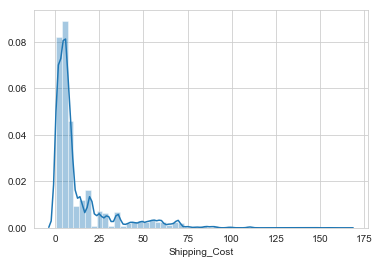

In [33]:
sns.distplot(df['Shipping_Cost'])
plt.show()

<center> <h3> Rug plots </h3></center> 

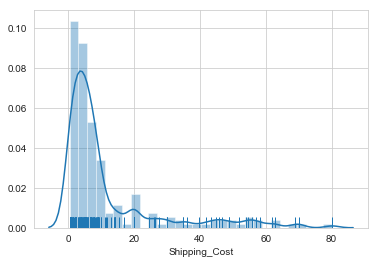

In [34]:
sns.distplot(df['Shipping_Cost'][:200], rug=True)
plt.show()

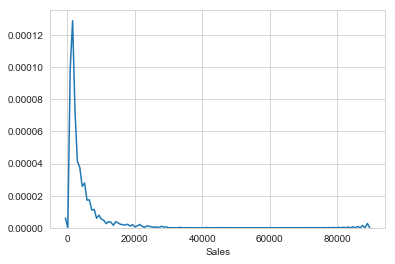

In [35]:
sns.distplot(df['Sales'], hist=False)
plt.show()

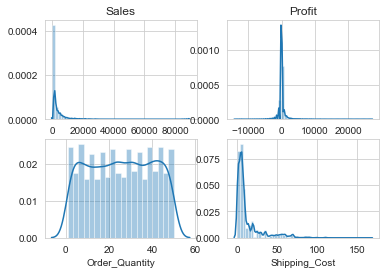

In [36]:
plt.subplot(2,2,1)
plt.title('Sales')
sns.distplot(df['Sales'])

plt.subplot(2,2,2)
plt.title('Profit')
sns.distplot(df['Profit'])

plt.subplot(2,2,3)
sns.distplot(df['Order_Quantity'])

plt.subplot(2,2,4)

sns.distplot(df['Shipping_Cost'])

plt.show()

<center> <h3> Box Plot </h3></center> 

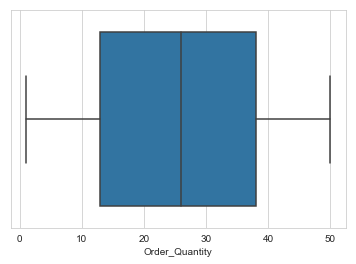

In [37]:
sns.boxplot(df['Order_Quantity'])
plt.show()

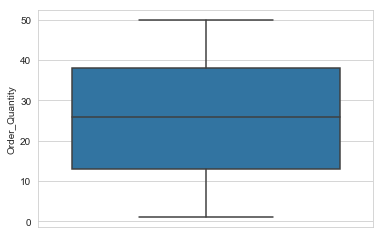

In [38]:
sns.boxplot(y =  df['Order_Quantity'])
plt.show()

 <center> <h3> Visualising Bivarient Distribution </h3></center> 

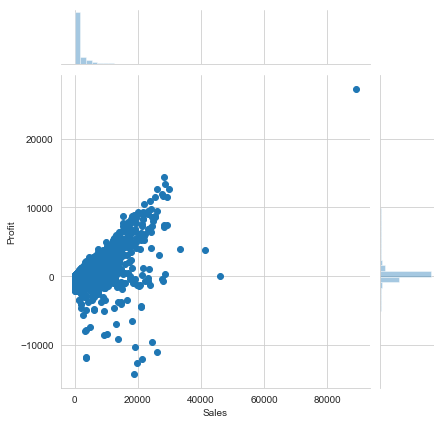

In [39]:
sns.jointplot('Sales', 'Profit', df)
plt.show()

Lets remove that outlier porint and plot once again

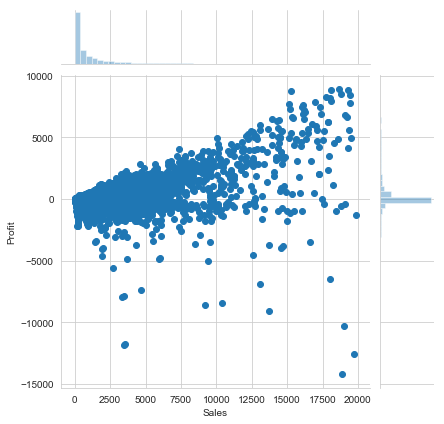

In [40]:
df = df[(df.Profit < 10000) & (df.Sales < 20000)]
sns.jointplot('Sales', 'Profit', df)
plt.show()

In [65]:
btc = pd.read_csv('crypto_data/bitcoin_price.csv')
either = pd.read_csv('crypto_data/ethereum_price.csv')
ltc  = pd.read_csv('crypto_data/litecoin_price.csv')
monero = pd.read_csv('crypto_data/monero_price.csv')
neo = pd.read_csv('crypto_data/neo_price.csv')
quantum = pd.read_csv('crypto_data/qtum_price.csv')
ripple = pd.read_csv('crypto_data/ripple_price.csv')

In [66]:
btc.columns = btc.columns.map(lambda x : str(x) + '_btc')
either.columns = either.columns.map(lambda x : str(x) + '_eti')
ltc.columns = ltc.columns.map(lambda x : str(x) + '_ltc')
monero.columns = monero.columns.map(lambda x : str(x) + '_mon')
neo.columns = neo.columns.map(lambda x : str(x) + '_neo')
quantum.columns = quantum.columns.map(lambda x : str(x) + '_qtm')
ripple.columns = ripple.columns.map(lambda x : str(x) + '_rip')

In [67]:
btc.head()

,Date_btc,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Market Cap_btc
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"


In [68]:
m1 = pd.merge(btc, either, how='inner', left_on='Date_btc', right_on='Date_eti')
m2 = pd.merge(m1, ltc, how='inner', left_on='Date_btc', right_on='Date_ltc')
m3 = pd.merge(m2, monero, how='inner', left_on='Date_btc', right_on='Date_mon')
m4 = pd.merge(m3, neo, how='inner', left_on='Date_btc', right_on='Date_neo')
m5 = pd.merge(m4, quantum, how='inner', left_on='Date_btc', right_on='Date_qtm')
crypto = pd.merge(m5, ripple, how='inner', left_on='Date_btc', right_on='Date_rip')

crypto.head()

,Date_btc,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Market Cap_btc,Date_eti,Open_eti,High_eti,...,Close_qtm,Volume_qtm,Market Cap_qtm,Date_rip,Open_rip,High_rip,Low_rip,Close_rip,Volume_rip,Market Cap_rip
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000","Nov 07, 2017",298.57,304.84,...,11.21,"122,951,000","760,320,000","Nov 07, 2017",0.205103,0.211375,0.203978,0.210354,"114,073,000","7,902,920,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000","Nov 06, 2017",296.43,305.42,...,10.44,"116,937,000","745,802,000","Nov 06, 2017",0.201967,0.208662,0.201410,0.205990,"102,233,000","7,782,080,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000","Nov 05, 2017",300.04,301.37,...,10.13,"49,288,500","739,113,000","Nov 05, 2017",0.203274,0.205124,0.201117,0.202055,"46,959,000","7,832,450,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000","Nov 04, 2017",305.48,305.48,...,10.05,"35,477,100","759,110,000","Nov 04, 2017",0.208083,0.208479,0.202133,0.203750,"74,013,200","8,017,770,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000","Nov 03, 2017",288.50,308.31,...,10.38,"55,018,600","719,701,000","Nov 03, 2017",0.206205,0.228026,0.201728,0.208133,"373,402,000","7,945,410,000"


In [70]:
curr = crypto [['Close_btc', 'Close_eti', 'Close_ltc', 'Close_mon', 'Close_neo', 'Close_qtm']]
curr.head()

,Close_btc,Close_eti,Close_ltc,Close_mon,Close_neo,Close_qtm
0,7144.38,294.66,61.30,99.76,26.23,11.21
1,7022.76,298.89,55.17,102.92,26.32,10.44
2,7407.41,296.26,54.75,86.35,26.38,10.13
3,7379.95,300.47,55.04,87.30,26.49,10.05
4,7207.76,305.71,56.18,87.99,26.82,10.38


 <center> <h3> Pair Plots </h3></center> 

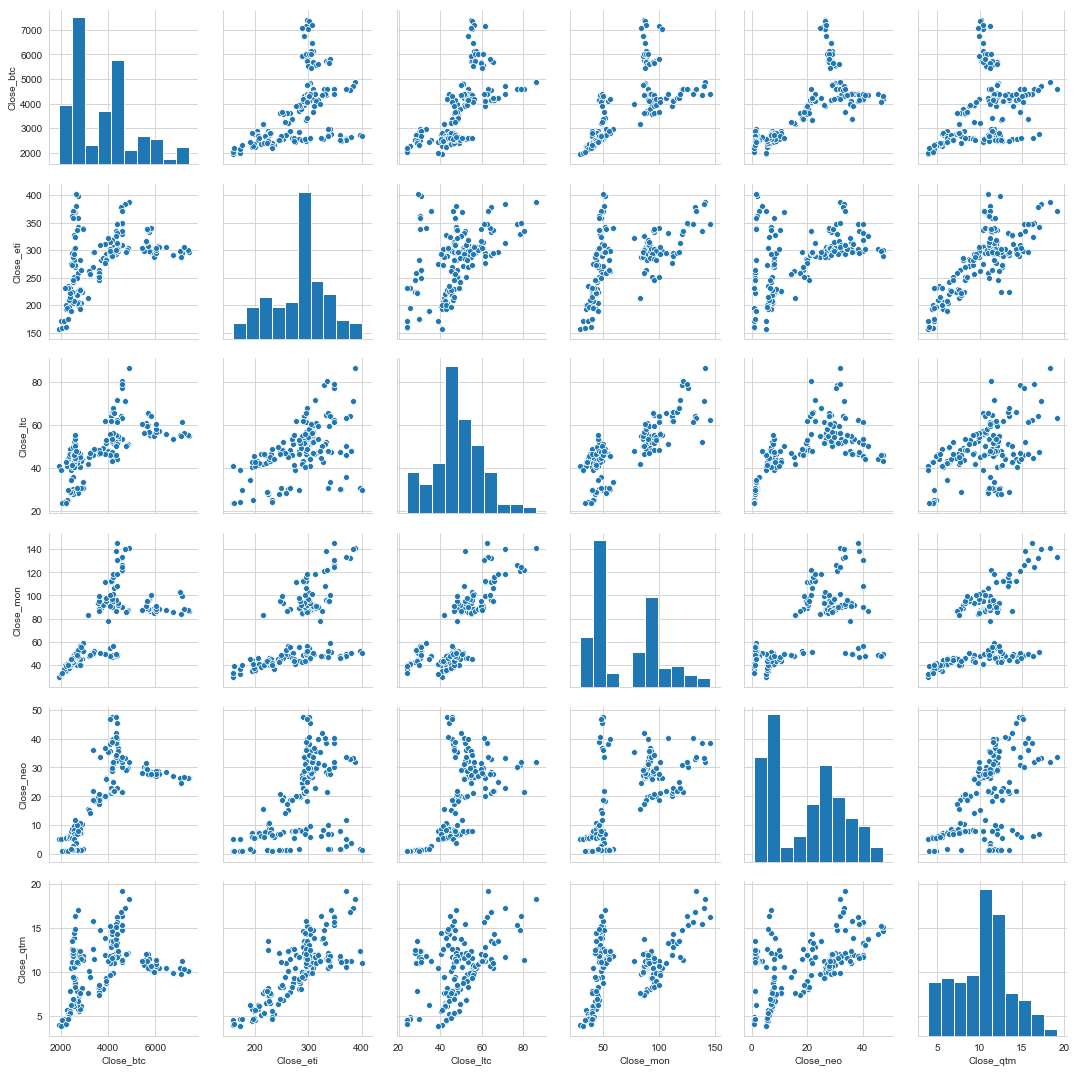

In [71]:
sns.pairplot(curr)
plt.show()

 <center> <h3> Heat maps </h3></center> 

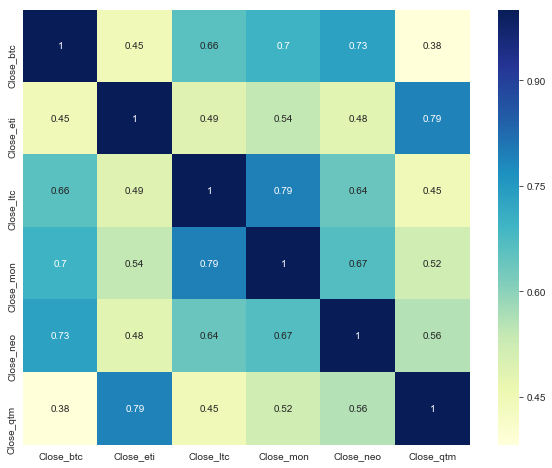

In [74]:
cor = curr.corr()
round(cor, 3)
plt.figure(figsize = (10,8))
sns.heatmap(cor, cmap='YlGnBu', annot=True)
plt.show()

<h3> <center>Assembeled & Compiled by : Hafiz Muhammad Waqas </center> </h3>